<a href="https://colab.research.google.com/github/Abhi08ch/CodVeda-Technologies/blob/main/L2_Task_3_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEVEL-3**

# **Task 3:  K-means Clustering**

In [24]:
# 1. Import all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 2. Load the dataset
df = pd.read_csv("/content/1) iris.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# 3. Prepare Features
x = df.drop(['species'], axis=1)

In [7]:
# 4. Scale the features
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

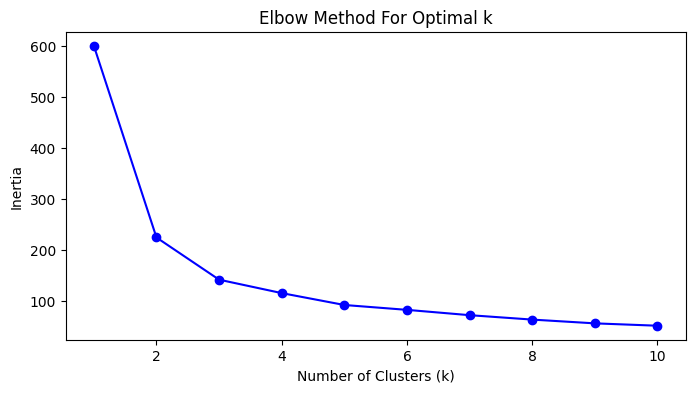

In [12]:
# 5. Use the elbow method to find optimal number of clusters
inertia =[]
K = range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit_transform(x_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()



In [17]:
# 6. Fit KMeans with k=3 (since we know Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_transform(x_scaled)
clusters = kmeans.labels_

In [18]:
# 7. Add cluster labels to the DataFrame
df['Cluster'] = clusters

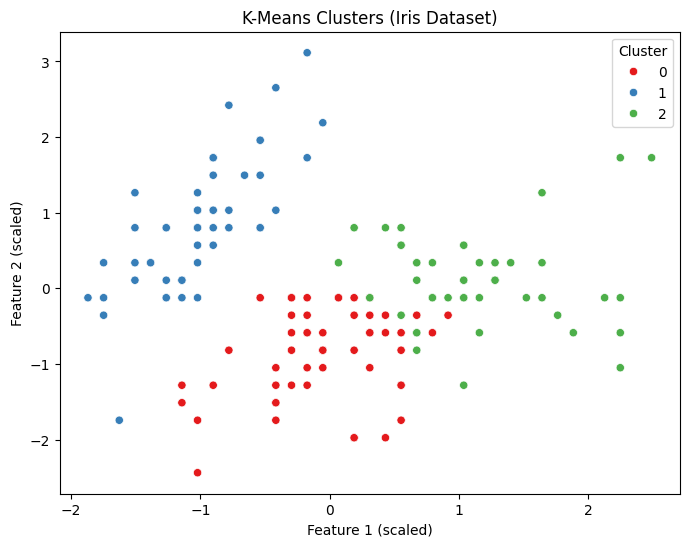

In [19]:
# 8. Visualize the clusters (using first two features for 2D plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=clusters, palette='Set1')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clusters (Iris Dataset)')
plt.legend(title='Cluster')
plt.show()

In [25]:
# 9. Evaluate clustering with silhouette score
score = silhouette_score(x_scaled, clusters)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.46


In [26]:
# 10. Compare clusters with actual species
print(pd.crosstab(df['species'], df['Cluster']))

Cluster      0   1   2
species               
setosa       0  50   0
versicolor  39   0  11
virginica   14   0  36
